# Overall data analysis

In [6]:
import os
from matplotlib import pyplot
import pandas as pd
import numpy as np
%matplotlib inline

os.chdir("C:/Users/Admin/Downloads")
data = pd.read_csv("./data.csv",delimiter=", ", header=0, engine='python')

def rollingAverage(n, data):
    return np.convolve(data, np.ones(n), 'valid')/n

def dailyAverage(data):
    toReturn = []
    iterations = int(len(data)/24)
    for i in range(iterations):
        toReturn.append(np.mean(data[i * 24:(i + 1) * 24 - 1]))
    return toReturn

def countingSequence(n):
    toReturn = []
    for i in range(n):
        toReturn.append(i + 1)
    return toReturn

data.tail()

,Timestamp,Current White Pixels,Old White Pixels,Pixel Count Delta,Daily RGR,Hourly RGR
285,2021-08-16 11:00:01.881494,3095612,2919657,175955,0.058519,0.002438
286,2021-08-16 12:00:01.808522,3096345,2917690,178655,0.059430,0.002476
287,2021-08-16 13:00:01.440034,3100834,2935714,165120,0.054720,0.002280
288,2021-08-16 14:00:01.799121,3108917,2932506,176411,0.058417,0.002434
289,2021-08-16 15:00:01.752784,3116968,2954130,162838,0.053657,0.002236


Text(0.5, 1.0, 'RGR for the past 24 hours, recorded every hour')

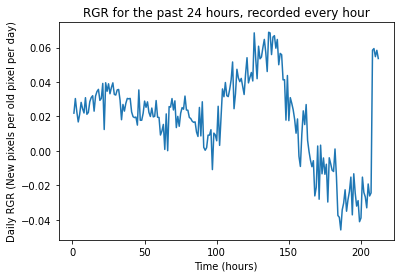

In [7]:
pyplot.plot(countingSequence(len(data[78:len(data)])), data['Daily RGR'][78:len(data)])
pyplot.xlabel("Time (hours)")
pyplot.ylabel("Daily RGR (New pixels per old pixel per day)")
pyplot.title("RGR for the past 24 hours, recorded every hour")

Text(0.5, 1.0, 'RGR for the past 24 hours, recorded every hour, with a 50-point rolling average')

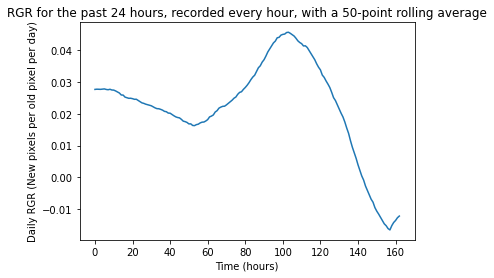

In [8]:
rollingDaily = rollingAverage(50, data['Daily RGR'][78:len(data)])
pyplot.plot(rollingDaily)
pyplot.xlabel("Time (hours)")
pyplot.ylabel("Daily RGR (New pixels per old pixel per day)")
pyplot.title("RGR for the past 24 hours, recorded every hour, with a 50-point rolling average")

Text(0.5, 1.0, 'RGR for the past 24 hours, recorded every hour, with a 3-point rolling average')

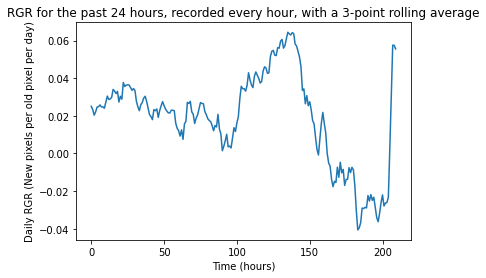

In [9]:
rolling3Hourly = rollingAverage(3, data['Daily RGR'][78:len(data)])
pyplot.plot(rolling3Hourly)
pyplot.xlabel("Time (hours)")
pyplot.ylabel("Daily RGR (New pixels per old pixel per day)")
pyplot.title("RGR for the past 24 hours, recorded every hour, with a 3-point rolling average")

Text(0.5, 1.0, 'RGR for the past 24 hours, recorded every hour and averaged every 24 hours')

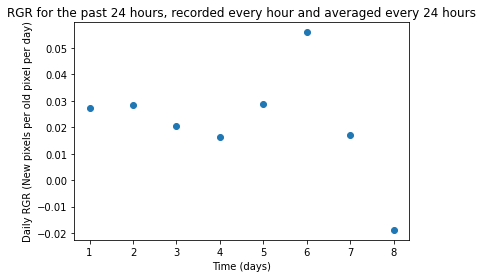

In [10]:
daily = dailyAverage(data['Daily RGR'][78:len(data)])
sequence = countingSequence(len(daily))
pyplot.scatter(sequence, daily)
pyplot.xlabel("Time (days)")
pyplot.ylabel("Daily RGR (New pixels per old pixel per day)")
pyplot.title("RGR for the past 24 hours, recorded every hour and averaged every 24 hours")

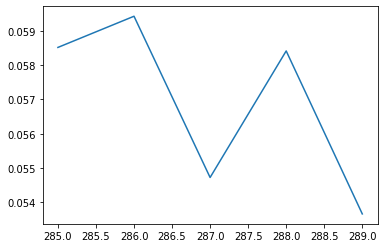

In [15]:
sinceAdjustment = data['Daily RGR'][285:len(data)]
pyplot.plot(sinceAdjustment)